In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('UpdatedResumeDataSet.csv')

In [4]:
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [5]:
data['Category']

0      Data Science
1      Data Science
2      Data Science
3      Data Science
4      Data Science
           ...     
957         Testing
958         Testing
959         Testing
960         Testing
961         Testing
Name: Category, Length: 962, dtype: object

In [6]:
data['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

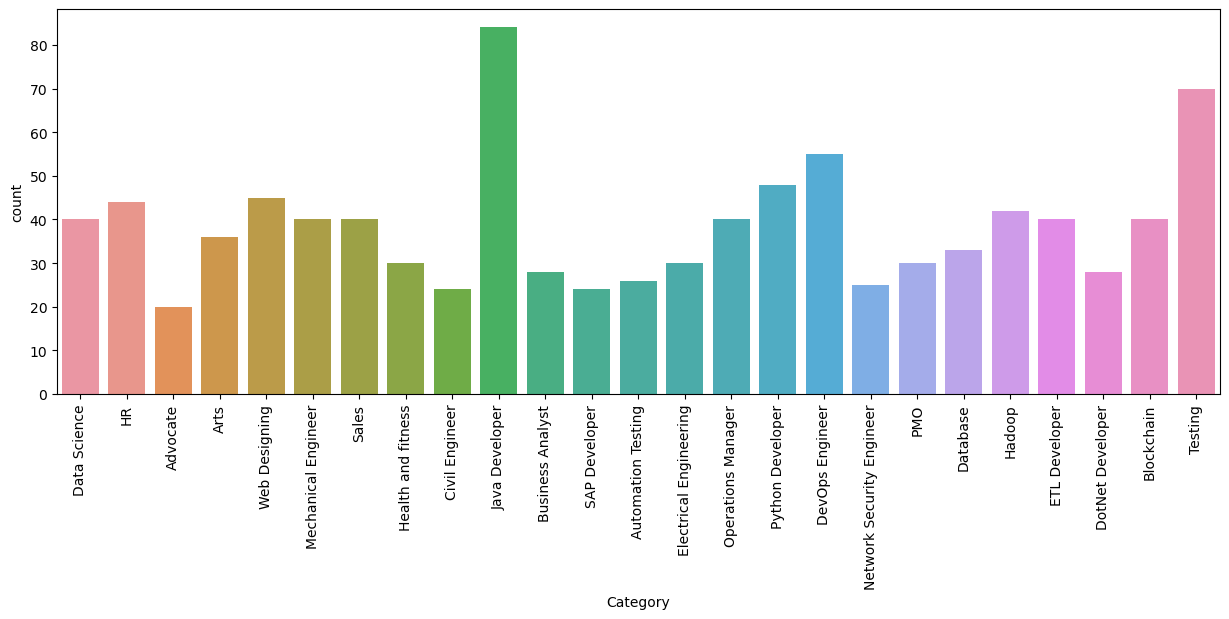

In [13]:
plt.figure(figsize=(15,5))
sns.countplot(data, x=data['Category'])
plt.xticks(rotation=90)
plt.show()

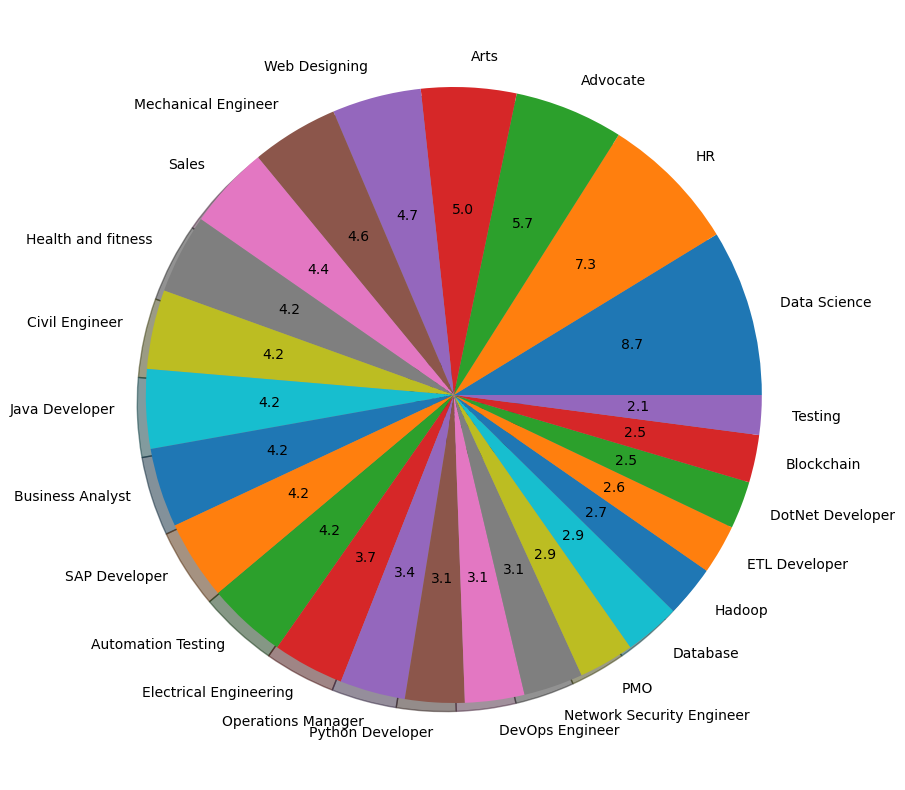

In [19]:
counts = data['Category'].value_counts()
labels = data['Category'].unique()

plt.figure(figsize=(15,10))
plt.pie(counts, labels=labels, autopct='%1.1f', shadow=True)
plt.show()

In [54]:
data['Resume'][496]

"Skills 1 MC Office 2 AutoCAD 2016 3 Introductory Knowledge of EPLAN 4 SAP ERP for Product specific coding Strengths 1 Ability to complete the work within stipulated time 2 Keeping calm under pressure 3 Multi Tasking 4 Experienced in a project engineering role 5 Good interpersonal skills team spirit flexibility can cope with stress 6 Fluent in English 7 Good knowledge of international standards and rules like ISO ATEX NFPA IEC NEC Shell DEP etc College Final Year Project Topic Study & Control of State Power Grid Maharashtra Supervisor Prof Jawaleker Place Shri Sant Gajanan Maharaj College of Engineering Shegaon Maharashtra Description The project aims to study of Power Grid network & Operation for Maharashtra state at Regional Power Grid Centre Nagpur India Education Details Thermal Power Plant Engineering Nangal Punjab National Power Training Institute B E Electrical Engineering Shegaon Maharashtra Shri Sant Gajanan Maharaj College of Engineering Shegaon Maharashtra India HSC Chandrap

In [24]:
import re
def cleanResume(txt):
    cleanTxt = re.sub('http\S+\s',' ', txt)
    cleanTxt = re.sub('RT|cc',' ', cleanTxt)
    cleanTxt = re.sub('@\S+',' ', cleanTxt)
    cleanTxt = re.sub('#\S+\s+',' ', cleanTxt)
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%@"()*+,-./:;<=>?@[\]^_`{|}~"""),' ', cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ', cleanTxt)
    cleanTxt = re.sub('\s+',' ', cleanTxt)
    return cleanTxt

In [25]:
data['Resume'] = data['Resume'].apply(lambda x: cleanResume(x))
data['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to a ept the challenges Positive ...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS Power ...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

In [26]:
data['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA & Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst & Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst & Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a eleratin

In [27]:
data

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,Testing,Computer Skills Proficient in MS office Word B...
958,Testing,Willingness to a ept the challenges Positive ...
959,Testing,PERSONAL SKILLS Quick learner Eagerness to lea...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS Power ...


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [65]:
le.fit(data['Category'])
data['Category'] = le.transform(data['Category'])
data['Category'].unique()


array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(data['Resume'])
rt = tfidf.transform(data['Resume'])

In [44]:
rt.shape

(962, 7351)

In [45]:
data['Category'].shape

(962,)

In [34]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(rt, data['Category'], test_size=0.2, random_state=42)

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9844559585492227


In [57]:
import pickle

pickle.dump(tfidf, open('tfidf.pkl', 'wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))


In [55]:
myresume = "Skills 1 MC Office 2 AutoCAD 2016 3 Introductory Knowledge of EPLAN 4 SAP ERP for Product specific coding Strengths 1 Ability to complete the work within stipulated time 2 Keeping calm under pressure 3 Multi Tasking 4 Experienced in a project engineering role 5 Good interpersonal skills team spirit flexibility can cope with stress 6 Fluent in English 7 Good knowledge of international standards and rules like ISO ATEX NFPA IEC NEC Shell DEP etc College Final Year Project Topic Study & Control of State Power Grid Maharashtra Supervisor Prof Jawaleker Place Shri Sant Gajanan Maharaj College of Engineering Shegaon Maharashtra Description The project aims to study of Power Grid network & Operation for Maharashtra state at Regional Power Grid Centre Nagpur India Education Details Thermal Power Plant Engineering Nangal Punjab National Power Training Institute B E Electrical Engineering Shegaon Maharashtra Shri Sant Gajanan Maharaj College of Engineering Shegaon Maharashtra India HSC Chandrapur Maharashtra Vidya Niketan Jr College SSC Chandrapur Maharashtra Vidya Mandir High School Industrial Electrical Design Engineering along with project management Skill Details AUTOCAD Exprience 74 months ENTERPRISE RESOURCE PLANNING Exprience 6 months EPLAN Exprience 6 monthsCompany Details company Osmoflo Engineering Services Pvt Ltd description along with project management 1 Preparation of Electrical Design Basis Electrical Scope of work Electrical Technical Specification Electrical Data Sheet and Electrical Single Line Diagram SLD as per Project Standards 2 Preparation and Review Electrical Drawings layouts like Hazardous Area Classification Electrical Indoor and Outdoor Lighting Layout Earthing and Lightning Protection Layout Drawing Substation Equipment and Trench Layout Drawing Overall Cable Layout Drawing Bill of Material BOM MR for Electrical Equipment and Cable Schedules 3 Oil and Gas Water Treatment Plant for Overseas customer at Australia company M s VIVID ELECTROMECH PVT LTD description for Whole Pune region Period 06th June 2017 to 20th Aug 2018 Nature of Job Electrical Sales Marketing Project Management of HT LT Panels Bus Duct Voltage Stabilizers for Residential Commercial Industrial Projects 1 Responsible for Sales and Marketing of all HT LT Panels Bust Duct Voltage Stabilizer in whole Pune Region and overall project management of awarded orders 2 Having Developed Big customer base in Pune region useful for business development of Residential Commercial Industrial Projects 3 Technical design as well as Commercial Bidding Negotiation meetings with Customers Market survey 4 Authorised Panel Builder for Schneider & System House for Ti Design of L & T company M s ADOR WELDING LTD description Period 17th July 2012 to 30th May 2017 Nature Of Job Industrial Electrical Design along with project Operation management 1 Prepare Electrical Design Basis Electrical Scope of work Electrical Technical Specification Electrical Data Sheet and Electrical Single Line Diagram SLD as per Project Standards 2 Prepare and Review Electrical Drawings layouts like Hazardous Area Classification Electrical Indoor and Outdoor Lighting Layout Earthing and Lightning Protection Layout Drawing Substation Equipment and Trench Layout Drawing Overall Cable Layout Drawing Bill of Material BOM MR for Electrical Equipment and Cable Schedules 3 Conversant with AutoCAD with 5 years of exp introductory knowledge of ETAP with Excellent Verbal Written Communication 4 4 years of experience with applying NEC IEC CSA IECEx ATEX UL FM NFPA and API codes and standards to Electrical Engineering Design 5 RCA DFMEA Part of Design Modification & Innovation Team 6 Technical Quotation Technical Query and Technical Bid Evaluation Co Ordinate with Clients Vendors during the Projects 7 Vendor Development Team lead Review Vendor Documents Factory A eptance Test FAT Site A eptance Test SAT Responsibilities Handled 1 Project Lead for YIBAL Petroleum Development of OMAN's project company M s PRAKASH INDUSTRIES LTD description Period 1st Sept 2011 to 6thMay 2012 Responsibilities Handled 1 Operation & Maintenance of Various Electrical Drives Related with CFBC Boiler as well as Turbine section 2 Daily Operation & Routine Maintenance of 132kV AC Switch yard Nature of Job 1 Electrical Operation & Maintenance of 100 MW Power Plant 2 Shift In charge for 3 months Certification Courses Certified Course in AutoCAD from CADD Centre JM Road Pune"

In [70]:
clf = pickle.load(open('clf.pkl', 'rb'))
cleaned_resume = cleanResume(myresume)
input_features = tfidf.transform([cleaned_resume])
prediction_id = clf.predict(input_features)[0]

category_mapping = {6:'Data Science', 12:'HR', 0:'Advocate', 1:'Arts', 24:'Web Designing',
       16:'Mechanical Engineer', 22:'Sales', 14:'Health and fitness',
       5:'Civil Engineer', 15:'Java Developer', 4:'Business Analyst',
       21:'SAP Developer', 2:'Automation Testing', 11:'Electrical Engineering',
       18:'Operations Manager', 20:'Python Developer', 9:'DevOps Engineer',
       17:'Network Security Engineer', 19:'PMO', 7:'Database', 13:'Hadoop',
       10:'ETL Developer', 9:'DotNet Developer', 3:'Blockchain', 23:'Testing'}
category_name = category_mapping.get(prediction_id, "Unknown")

print (category_name)

Electrical Engineering
